In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('loan.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data_without_id = data.drop(columns=['Loan_ID'], axis=1)

In [7]:
data_without_id.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [83]:
from pandas.api.types import is_numeric_dtype
obj_columns = []
numerical_columns = []
for col in data_without_id.columns:
    if is_numeric_dtype(data_without_id[col]):
        numerical_columns.append(col)
    else:
        obj_columns.append(col)

In [84]:
obj_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Applicant_Income_Class',
 'Total_Income_Class']

In [85]:
numerical_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Total_income',
 'Loan_Amount_Term_years',
 'emi',
 'emi_income_percentage']

In [11]:
data[obj_columns].describe()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [12]:
data[numerical_columns].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
data_without_id['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

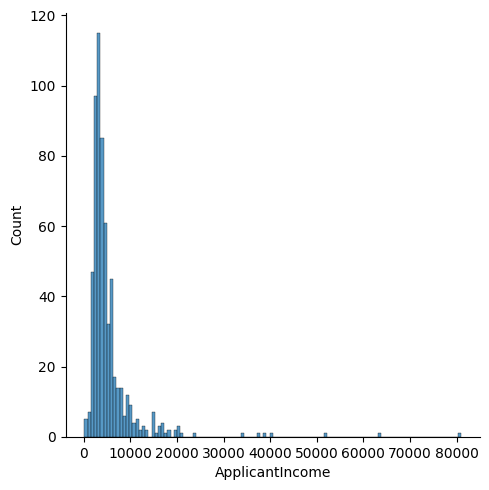

In [14]:
sns.displot(data_without_id['ApplicantIncome'] )

In [15]:
data_without_id.groupby('Loan_Status')["ApplicantIncome"].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

<Axes: xlabel='Loan_Status'>

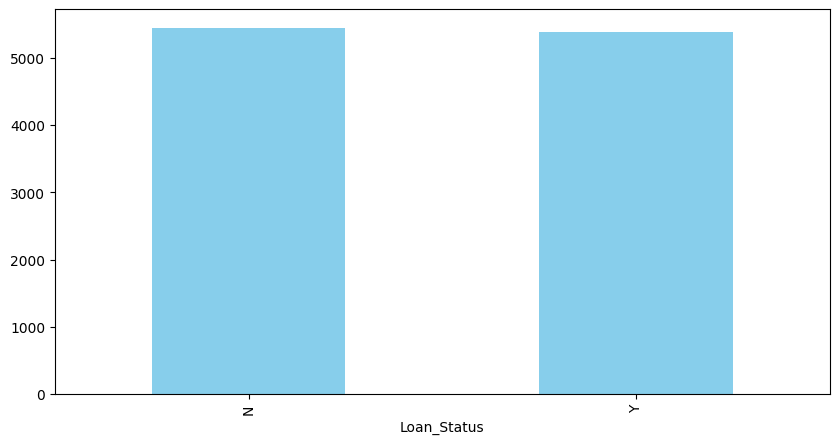

In [16]:
data_without_id.groupby('Loan_Status')["ApplicantIncome"].mean().plot(kind='bar', figsize=(10, 5), color='skyblue')

In [17]:
data_without_id.groupby("Loan_Status").apply(
    lambda r:(r["CoapplicantIncome"]+r["ApplicantIncome"]).mean()
)

C:\Users\sangram.samanta\AppData\Local\Temp\ipykernel_16088\1889569717.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_without_id.groupby("Loan_Status").apply(


Loan_Status
N    7323.885417
Y    6888.585118
dtype: float64

In [18]:
bins = [0, 2500, 4000, 6000, 8000]
groups = ["low", "avg", "high", "v high"] 

In [19]:
data_without_id["Applicant_Income_Class"] = pd.cut(data_without_id["ApplicantIncome"], bins=bins, labels=groups)

In [20]:
data_without_id["Applicant_Income_Class"]

0        high
1        high
2         avg
3         avg
4        high
        ...  
609       avg
610      high
611       NaN
612    v high
613      high
Name: Applicant_Income_Class, Length: 614, dtype: category
Categories (4, object): ['low' < 'avg' < 'high' < 'v high']

In [21]:
pd.crosstab(data_without_id["Applicant_Income_Class"], data_without_id["Loan_Status"])
# here N means rejected for loans and Y means accepted for the loan

Loan_Status,N,Y
Applicant_Income_Class,,
low,34,74
avg,67,159
high,45,98
v high,20,34


In [22]:
data_without_id["Total_income"] = data_without_id["ApplicantIncome"]+data_without_id["CoapplicantIncome"]

In [23]:
data_without_id.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_income
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,7024.705081
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,6458.663872
min,150.000000,0.000000,9.000000,12.00000,0.000000,1442.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,4166.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,5416.500000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,7521.750000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,81000.000000


In [24]:
total_income_bins = [0, 2500, 4000, 6000, 81000]
total_income_groups = ["low", "avg", "high", "v high"]

In [25]:
data_without_id["Total_Income_Class"] = pd.cut(data_without_id["Total_income"], bins=total_income_bins, labels=total_income_groups)

In [26]:
df = pd.crosstab(data_without_id["Total_Income_Class"], data_without_id["Loan_Status"]) 
df 

Loan_Status,N,Y
Total_Income_Class,,
low,14,10
avg,32,87
high,65,159
v high,81,166


In [27]:
df.sum(axis=1)

Total_Income_Class
low        24
avg       119
high      224
v high    247
dtype: int64

In [28]:
df.div(df.sum(axis=1), axis=0)

Loan_Status,N,Y
Total_Income_Class,,
low,0.583333,0.416667
avg,0.268908,0.731092
high,0.290179,0.709821
v high,0.327935,0.672065


In [29]:
data_without_id["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [30]:
df = pd.crosstab(data_without_id["Loan_Amount_Term"], data_without_id["Loan_Status"])
df.div(df.sum(axis=1), axis=0)

Loan_Status,N,Y
Loan_Amount_Term,,
12.0,0.000000,1.000000
36.0,1.000000,0.000000
60.0,0.000000,1.000000
84.0,0.250000,0.750000
120.0,0.000000,1.000000
180.0,0.340909,0.659091
240.0,0.250000,0.750000
300.0,0.384615,0.615385
360.0,0.298828,0.701172


In [31]:
data_without_id["Loan_Amount_Term_years"] = data_without_id["Loan_Amount_Term"]/ 12

<Axes: >

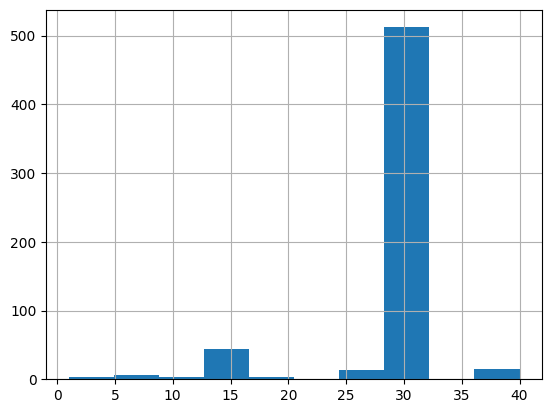

In [32]:
data_without_id["Loan_Amount_Term_years"].hist()

In [33]:
data_without_id["emi"] = data_without_id["LoanAmount"]/data_without_id["Loan_Amount_Term"]

<Axes: >

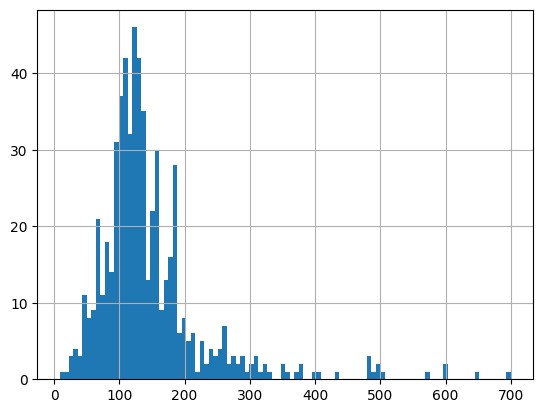

In [34]:
data_without_id["LoanAmount"].hist(bins=100)

<Axes: >

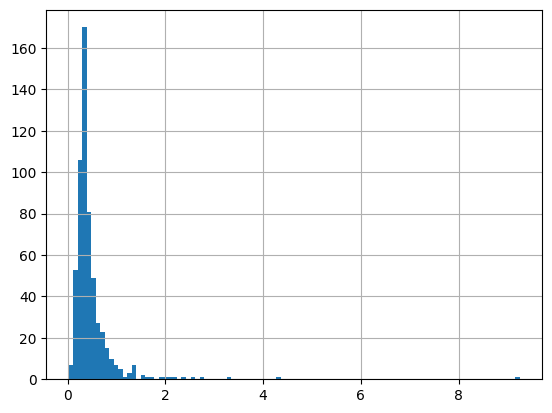

In [35]:
data_without_id["emi"].hist(bins=100)

In [36]:
data_without_id["emi_income_percentage"] = data_without_id["emi"]/(data_without_id["Total_income"]/1000)

In [37]:
data_without_id["emi_income_percentage"]

0           NaN
1      0.058374
2      0.061111
3      0.067463
4      0.065278
         ...   
609    0.068008
610    0.054121
611    0.084550
612    0.068501
613    0.080612
Name: emi_income_percentage, Length: 614, dtype: float64

<Axes: >

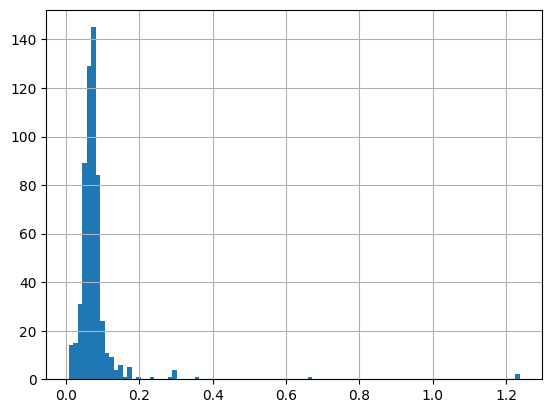

In [38]:
data_without_id["emi_income_percentage"].hist(bins=100)

<Axes: xlabel='emi_income_percentage'>

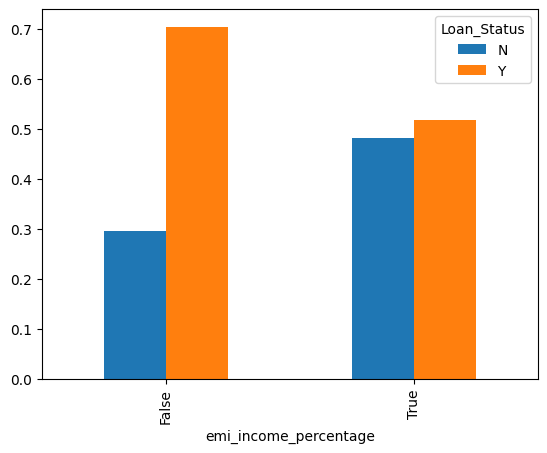

In [39]:
df = pd.crosstab(data_without_id["emi_income_percentage"]>0.1 , data_without_id["Loan_Status"])
df.div(df.sum(axis=1), axis=0).plot(kind='bar')

In [40]:
data_without_id["Credit_History"].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

<Axes: xlabel='Credit_History'>

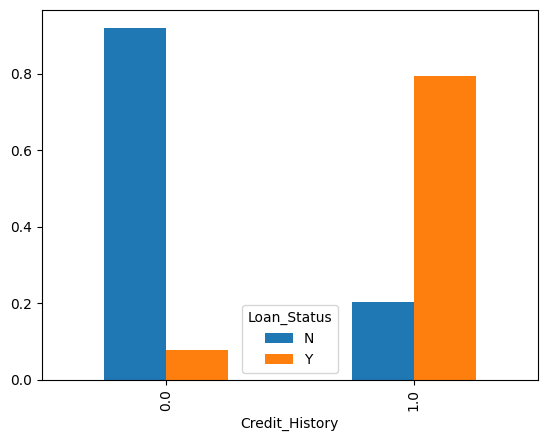

In [41]:
df = pd.crosstab(data_without_id["Credit_History"], data_without_id["Loan_Status"])
df.div(df.sum(axis=1), axis=0).plot(kind='bar')

Loan_Status         N         Y
Dependents                     
0            0.310145  0.689855
1            0.352941  0.647059
2            0.247525  0.752475
3+           0.352941  0.647059


<Axes: xlabel='Dependents'>

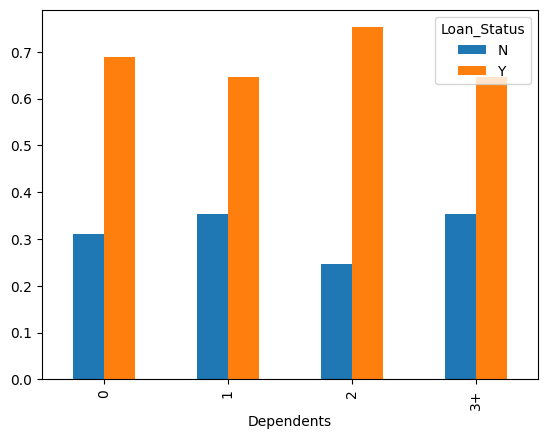

In [45]:
df = pd.crosstab(data_without_id["Dependents"], data_without_id["Loan_Status"])
result = df.div(df.sum(axis=1), axis=0)
print(result)
result.plot(kind='bar')

In [44]:
df.T.div(df.T.sum(axis=1), axis=0)

Dependents,0,1,2,3+
Loan_Status,,,,
N,0.575269,0.193548,0.134409,0.096774
Y,0.576271,0.159806,0.184019,0.079903


In [62]:
numerical_columns.remove("Credit_History")

In [63]:
obj_columns.append("Credit_History")

In [64]:
numerical_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Applicant_Income_Class',
 'Total_income',
 'Total_Income_Class',
 'Loan_Amount_Term_years',
 'emi',
 'emi_income_percentage']

In [65]:
obj_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Credit_History']

In [87]:
for col in numerical_columns:
    print(col+" ", type(data_without_id[col][0]))
    # median_income = data_without_id[col].median()
    # data_without_id[col].fillna(median_income, inplace=True)

ApplicantIncome  <class 'numpy.int64'>
CoapplicantIncome  <class 'numpy.float64'>
LoanAmount  <class 'numpy.float64'>
Loan_Amount_Term  <class 'numpy.float64'>
Credit_History  <class 'numpy.float64'>
Total_income  <class 'numpy.float64'>
Loan_Amount_Term_years  <class 'numpy.float64'>
emi  <class 'numpy.float64'>
emi_income_percentage  <class 'numpy.float64'>


In [72]:
numerical_columns.remove("Applicant_Income_Class")
numerical_columns.remove("Total_Income_Class")
# numerical_columns.remove("Total_Income_Class")


In [86]:
for col in numerical_columns:
    # print(col+" ", type(data_without_id[col][0]))
    median_income = data_without_id[col].median()
    data_without_id[col].fillna(median_income, inplace=True)

C:\Users\sangram.samanta\AppData\Local\Temp\ipykernel_16088\2135017762.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_without_id[col].fillna(median_income, inplace=True)
C:\Users\sangram.samanta\AppData\Local\Temp\ipykernel_16088\2135017762.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [88]:
for col in obj_columns:
    data_without_id[col].fillna(data_without_id[col].mode().iloc[0], inplace=True)

C:\Users\sangram.samanta\AppData\Local\Temp\ipykernel_16088\2365154393.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_without_id[col].fillna(data_without_id[col].mode().iloc[0], inplace=True)


In [89]:
data_without_id.isna().sum()

Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status               0
Applicant_Income_Class    0
Total_income              0
Total_Income_Class        0
Loan_Amount_Term_years    0
emi                       0
emi_income_percentage     0
dtype: int64